## Alumnos:

- Luis Felipe Acosta Zavaleta (20143350)
- Luciana Gimena Sarmiento Sulca (20202422)

# Lectura

La pregunta de investigación de Dell es cuál es el impacto —a largo plazo— de la mita, como sistema de trabajo forzado, en las poblaciones dentro del territorio peruano en las que esta modalidad de trabajo fue más difundida, teniendo en cuenta la tenencia de tierra, los bienes públicos y la participación en el mercado. 

Una de las fortalezas del artículo es que, a pesar de la distancia histórica, expone las implicancias de la mita en las poblaciones afectadas por tal. En este sentido, los principales hallazgos de Dell serían que los efectos de la mita en las zonas previstas son negativas; lo que podría explicar las diferencias y precariedad de las zonas del Perú donde predominó la mita. Por otro lado, a pesar de la dificultad de ser un trabajo enfocado en una etapa histórica antigua, Dell hizo un buen trabajo al presentar una regresión discontinua tomando en cuenta los límites geográficos de influencia de la mita. Asimismo, Dell supo delimitar muy bien el tema presentado: la mita (sistema de trabajo geolocalizado en una región específica del mundo) en zonas mineras (aún más delimitado). Esta buena delimitación del tema genera mayor confianza en las conclusiones que se puedan obtener. Sin embargo, una debilidad del trabajo podría ser que no se tomó mucha atención a las diferencias dentro de la misma región, tanto culturales como las pequeñas diferencias que pudieron existir del sistema de trabajo estudiado.

Por otro lado, el aporte del documento es que puede explicar y/o dar razones históricas a la precariedad y desigualdad entre las regiones del Perú referidas al consumo doméstico, estatura, educación e infraestructura. Sin embargo, aunque el documento usa una regresión discontinua, la autora debió tomar en consideración la distancia temporal y que, en esta, pueden haber otras variables a tomar en cuenta. Sin embargo, esto no le quita solidez a su trabajo debido a que, la mita —como la autora ha expuesto— ha tenido un efecto importante sobre el desarrollo de las poblaciones, siendo un factor a tomar en cuenta.

Existen dos temas relevantes para continuar la investigación. El primero está referido a los efectos de la mita respecto a la confianza en las instituciones en las zonas donde predominó esta modalidad de trabajo forzado y su relación con la informalidad empresarial y el desempeño de la actividad empresarial, lo que finalmente termina impactando en el desarrollo de las poblaciones (Natividad, 2019). Asimismo, otro aspecto importante a considerar es el impacto de la migración masiva, producto del desplazamiento forzado de la población, que se vio agravado durante la época del terrorismo, en el nivel de desarrollo actual de las áreas donde predominó la mita (Carpio y Guerrero, 2021). Es decir, agregar más variables al modelo propuesto por Dell a fin de explicar el escaso nivel de desarrollo de las zonas referidas.

**Referencias:**

Carpio, M. & Guerrero, M. (2021). *Did the Colonial mita Cause a Population Collapse? What Current Surnames Reveal in Peru*. The Journal of Economic History, 81(4), 1-37

Natividad, G. (2019). *Stunted firms: The long-term impacts of colonial taxation*. Journal of Financial Economics, 134(3), 525-548.


# Código

In [3]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import seaborn as sns
import matplotlib.pyplot as plt
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS

## Instrumental Variables

## 1. Para esta primera sección deben darle una leida a The Effect Book principalmente al capitulo de Instrumental Variables.

### - Explique en qué consiste el supuesto de "Relevance"

El supuesto de *relevance* del instrumento es uno de los supuestos que debe satisfacer una variable instrumental para funcionar.

Significa que *Z* (el instrumento) realmente está relacionado con *X* (el tratamiento). Para ello, debemos ver la relación entre *X* y *Z* y qué tan fuerte es esta. Mientras más fuerte es, más seguros podemos estar en la relevancia del supuesto y la estimación variará menos de una muestra a otra.


### - Explique en qué consiste el supuesto de "Validity"

El supuesto de *validity* del instrumento es uno de los supuestos que debe satisfacer una variable instrumental para funcionar.

*Validity* es el supuesto de que el instrumento *Z* es una variable que no tiene puertas traseras abiertas propias; es decir, cualquier *path* entre el instrumento y el resultado debe pasar por el tratamiento o cerrarse. Es el supuesto más difícil de asegurar. 

## Ploteo de histogramas

### 2. Tienen que trabajar con la misma data de educacion que utilicé en la clase_11. En este documento encontrarán una descripción detallada de todas las variables en el dataset.

Tomando en cuenta que la variable nearc4 representa si existe un college en el county debe realizar los siguientes ploteos de histogramas.

- Grafique dos histogramas para la variable años de educación educ para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


In [5]:
card_2 = (card
 .assign(college_in_county = np.select(
     [card["nearc4"].astype(bool)],
     ["1"],
      default="0"
 )))
card_2

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ,college_in_county
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539,0
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562,0
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975,0
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536,1
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,5218.0,0.0,1.0,12.0,25.0,8.0,12.0,82135.0,1.0,0.0,...,NaN,1.0,0.0,7.0,5.814130,49.0,-0.289775,6.103905,-1.505588,1
3006,5219.0,0.0,1.0,13.0,34.0,NaN,NaN,88765.0,1.0,0.0,...,NaN,1.0,1.0,15.0,6.175867,225.0,-0.137418,6.313285,2.214089,1
3007,5220.0,0.0,1.0,12.0,24.0,11.0,NaN,89271.0,0.0,0.0,...,109.0,1.0,0.0,6.0,6.214608,36.0,0.135805,6.078803,-1.907211,1
3008,5221.0,0.0,1.0,12.0,31.0,NaN,NaN,110376.0,1.0,0.0,...,107.0,1.0,1.0,13.0,6.569481,169.0,0.408375,6.161106,0.868737,1


<Figure size 1008x720 with 0 Axes>

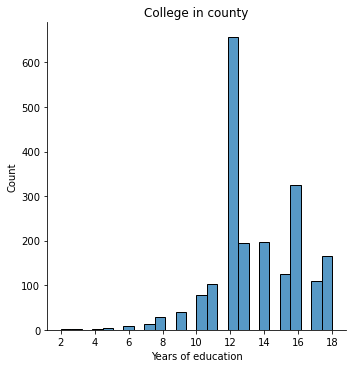

In [16]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==1]
ax = sns.displot(nearc4,x="educ")

plt.title('College in county')
plt.xlabel('Years of education')
plt.ylabel('Count')
plt.show()

<Figure size 1008x720 with 0 Axes>

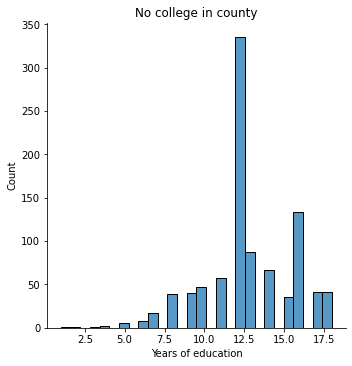

In [18]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==0]
ax = sns.displot(nearc4,x="educ")

plt.title('No college in county')
plt.xlabel('Years of education')
plt.ylabel('Count')
plt.show()

- Grafique dos histogramas para la variable años del logaritmos de los ingresos lwage para cuando nearc4 == 1, y cuando nearc4 == 0. Compare y describa los patrones que encuentra.

<Figure size 1008x720 with 0 Axes>

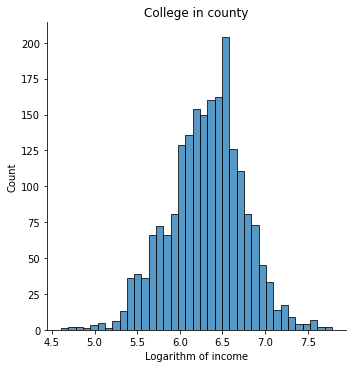

In [22]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==1]
ax = sns.displot(nearc4,x="lwage")

plt.title('College in county')
plt.xlabel('Logarithm of income')
plt.ylabel('Count')
plt.show()

<Figure size 1008x720 with 0 Axes>

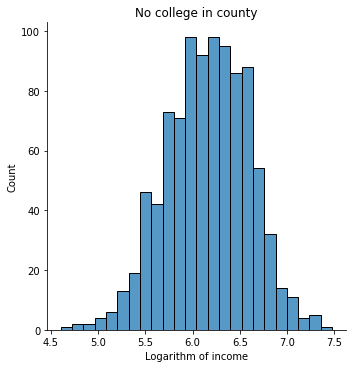

In [23]:
plt.figure(figsize=(14,10))

nearc4=card.loc[card['nearc4']==0]
ax = sns.displot(nearc4,x="lwage")

plt.title('No college in county')
plt.xlabel('Logarithm of income')
plt.ylabel('Count')
plt.show()

**Años de educación:**

Se puede evidenciar que la variable años de educación varía de manera diferente cuando existe un *college* en el condado (nearc4=1) y cuando no (nearc4=0). 

De manera general, hay una evidencia clara: la mayoría de personas, independientemente de la existencia de un *college* en el condado, llegan a los 12 años de educación, en el cual se encuentra un pico acumulativo de personas con esa educación en años. Asimismo, también se aprecia que cuando existe un *college* en el condado, la tendencia a que las personas estudien más años aumenta; mientras que cuando no existe un *college*, si bien la tendencia a que las personas estudien más años umenta, es menor en comparación al otro histograma. Por otro lado, también se puede notar que un porcentaje reducido de la población tiene 10 o menos años de estudio y que, por ende, la mayor parte de la población tiene más de 12 años de estudio, disminuyendo este con los años. 

Por último, en ambos gráficos  se reconoce un gran porcentaje de personas que estudiaron 16 años.

**Logaritmo de ingreso:**

Se puede evidenciar que la variable ingresos varía de manera diferente cuando existe un *college* en el condado y cuando no. De manera general se puede visualizar que el efecto de la existencia de un *college* es bastante claro. 

En primer lugar, cuando existe un *college*, la mayoría de personas tienen a tener un salario alto; mientras que cuando no existe un *college* en el condado, esto varía y, en realidad, se podría decir que hay una cantidad similiar de personas que tienen un menor y mayor salario. 

Por otro lado, en el segundo caso no hay personas que pasen los 7.5 de logaritmo de salario, mientras que en el primer caso sí los hay. Asimismo, en ambas partes, pero en proporción distinta, siendo mayor en los condados donde no existe un *college*, hay personas con un salario bajo.

## Regresiones

### 4. Ahora van a replicar las regresiones que hicimos en clase pero el instrumento Z ya no será nearc4 sino nearc2.

- Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa" y expliquen los resultados que encuentran.

In [10]:
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        17:22:28   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tras la regresión lineal, se puede ver el efecto de las variables independientes. Primero, educ, exper y smsa son las variables que tienen un relación directa con lwage; mientras que black, south y married  tienen una relación inversa con la misma.

En este sentido también se puede decir que:

- Cuando educación aumenta en uno, lwage (o el nivel de ingresos) aumentaría en 0.07.
- Cuando exper aumenta en uno, lwage aumenta en 0.03.
- Cuando smsa aumenta en uno, lwage aumenta en 0.17.
- Cuando black aumenta en uno, lwage disminuye en 0.16.
- Cuando south aumenta en uno, lwage disminuye en 0.13.
- Y, finalmente, cuando married aumenta en uno, lwage disminuye en 0.03.

Después de lo mencionado, se expone que la variable smsa es la que más hace variar a lwage. Asimismo, también se puede notar que el modelo explica en un 30% a la variable dependiente.

- Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2. La regressión debería tener una forma de este tipo "lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4 ]". Compare los resultados encontrados en la regresión de arriba. Cambió el coeficiente relacionado a educ, ¿por qué?

In [11]:
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc4]", card).fit()
iv_reg.summary

C:\Users\lfaco\anaconda3\lib\site-packages\linearmodels\iv\model.py:543: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                      0.2513
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2498
No. Observations:                3003   F-statistic:                    892.71
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        17:22:28   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.1625     0.8349     4.9857     0.0000      2.5262      5.7988
black         -0.1157     0.0496    -2.3343     0.0196     -0.2128     -0.0186
exper          0.0556     0.0199     2.7980     0.0051      0.0166      0.0945
married       -0.0320     0.0051    -6.3037     0.0000     -0.0419     -0.0220
smsa           0.1477     0.0303     4.8721     0.0000      0.0883      0.2071
south         -0.1132     0.0229    -4.9314     0.0000     -0.1581     -0.0682
educ           0.1242     0.0492     2.5258     0.0115      0.0278      0.2205
==============================================================================

Endogenous: educ
Instruments: nearc4
Robust Covariance (Heteroskedastic)
Debiased: False
"""

Tras las regresiones, se puede observar que, en cuanto a la relación de las independientes con la dependiente, no hay variaciones, pues estas siguen teniendo la relación de la primera regresión: educ, exper y smsa mantienen una relación directa con lwage; y, black, south y married mantienen una relación inversa con la misma. 

Por otro lado, sí se puede notar cambios con respecto al estimado de variación de lwage cuando las variables aumentan o disminuyen en uno:

- Cuando educ aumenta en uno, lwage aumentaría ya no en 0.07, sino en 0.12.
- Cuando exper aumenta en uno, lwage aumentaría ya no en 0.03, sino en 0.05.
- Cuando smsa aumenta en uno, lwage aumentaría ya no en 0.17, sino en 0.14.
- Cuando black aumenta en uno, lwage disminuiría ya no en 0.16, sino en 0.11.
- Cuando south aumenta en uno, lwage disminuiría ya no en 0.13, sino en 0.11.
- Sin embargo, cuando married aumenta en uno, lwage seguiría diminuyendo en 0.03.

Asimismo, este segundo modelo de regresión explica menos que el primero, pues tiene un porcentaje de explicación de 24%.